In [1]:
import numpy as np
from numpy.lib.function_base import cov
import pandas as pd
import matplotlib.pyplot as plt

start_period = '2006-10-01'

from init import download_data, plot_line, plot_hist, plot_box

In [2]:
def get_AdjC(df):
    # returns a dataframe with 1 column: adj closes
    df_adj = df["Adj Close"]
    return df_adj

In [3]:
def compute_CCreturns(df, aggregation = "M", name=""):
    df_adj = df["Adj Close"]    # using only adj closes
    df_adj_op = df_adj.groupby(pd.Grouper(freq = aggregation))  # aggregation (default: monthly)
    df_adj = df_adj_op.mean()   # aggregate with avg
    df_returns = np.log(df_adj/df_adj.shift(1)) # calculating CC returns
    df_returns.name = name + " CC Return"
    
    # dropping na values
    return df_returns.dropna()

In [4]:
all_stocks = ["AAPL", "NVDA", "KO", "UL", "BAC", "AXP"]
dataframes = download_data(stocks = all_stocks, start_stream = start_period)

[] downloading AAPL	 -> Done
[] downloading NVDA	 -> Done
[] downloading KO	 -> Done
[] downloading UL	 -> Done
[] downloading BAC	 -> Done
[] downloading AXP	 -> Done


-- plotting adjusted closes individually


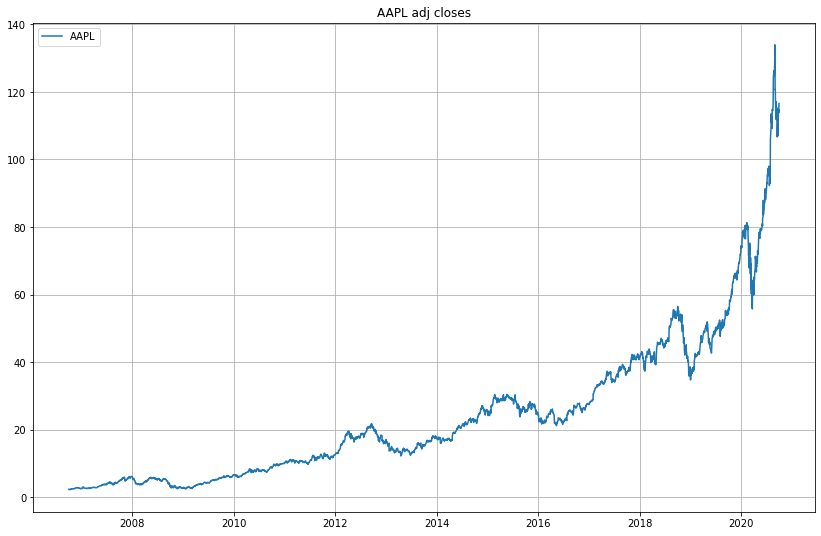

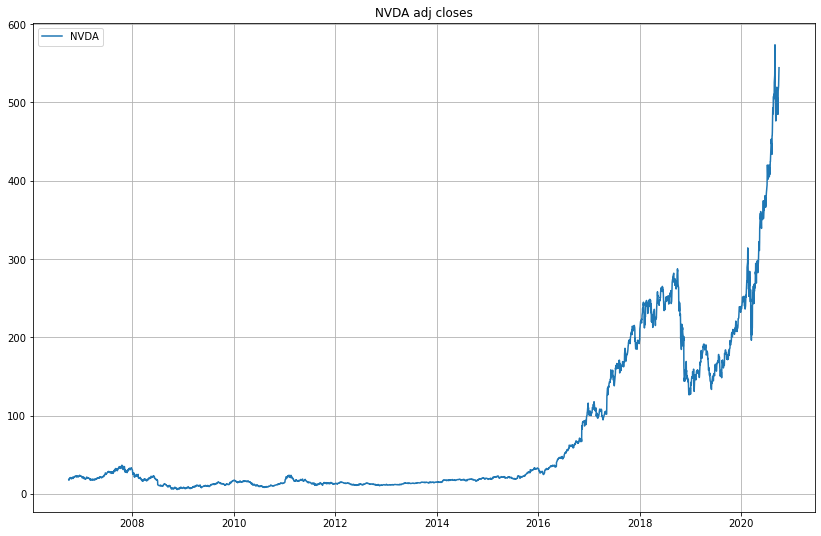

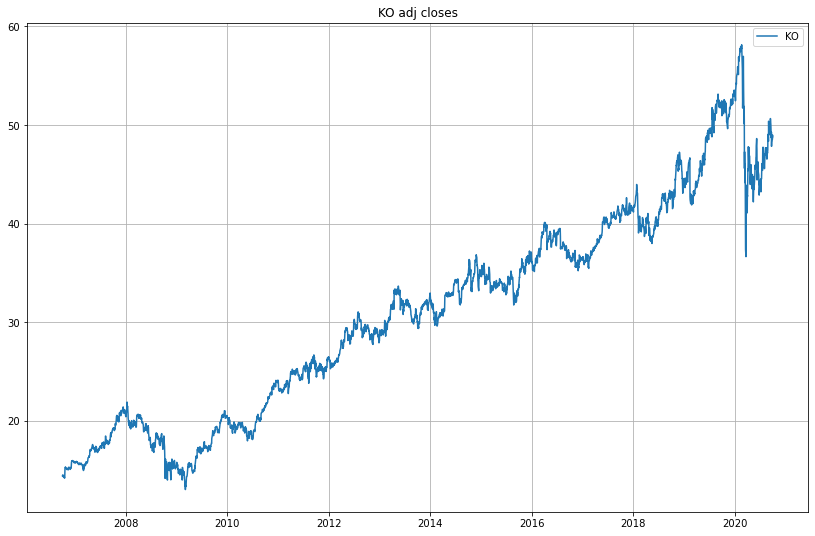

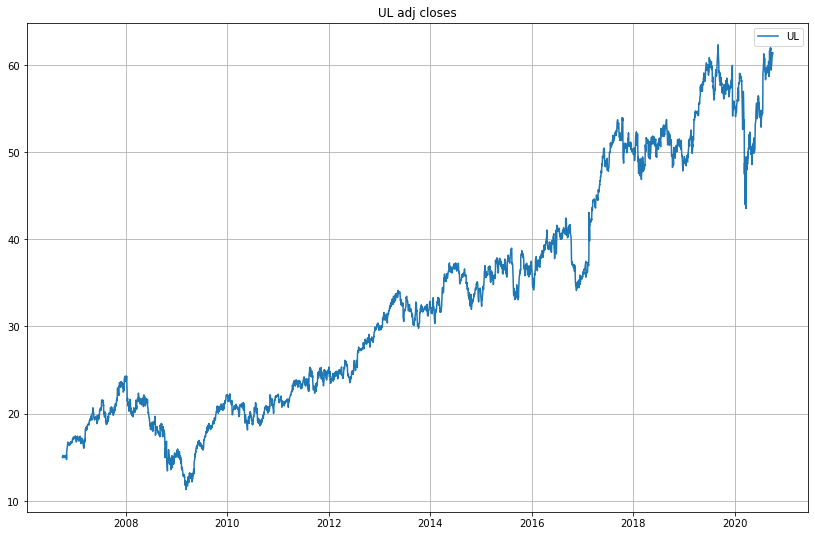

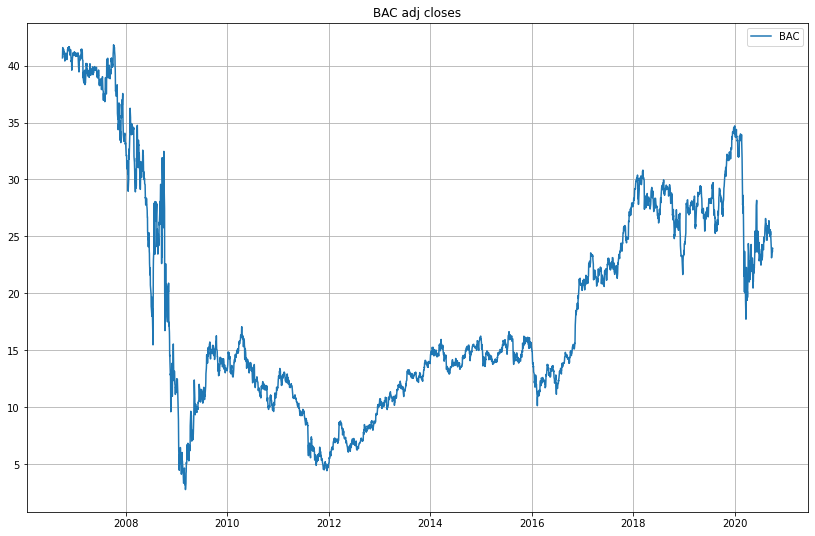

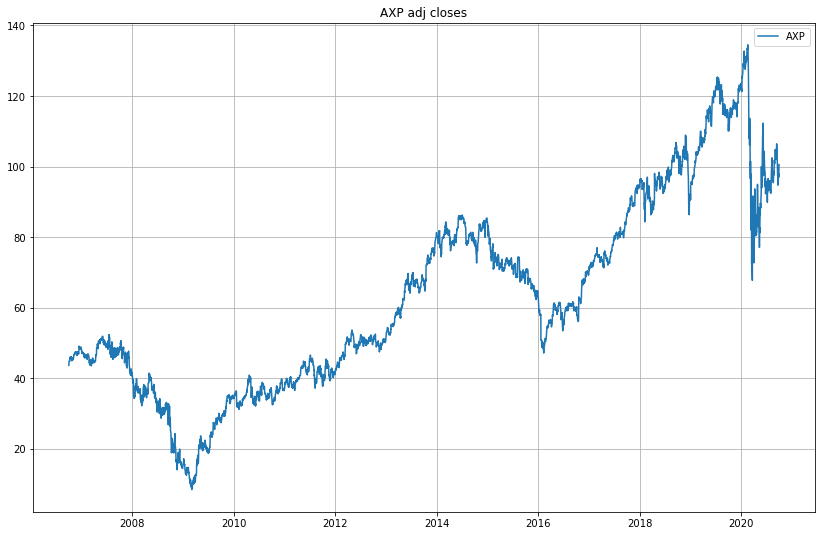

In [5]:
print("-- plotting adjusted closes individually")
for s in all_stocks:
    plot_line({s: get_AdjC(dataframes[s])}, title = s + " adj closes", xlabel = "time", ylabel = "value").show()

-- comparing all the stock's adj close in the list simultaneously


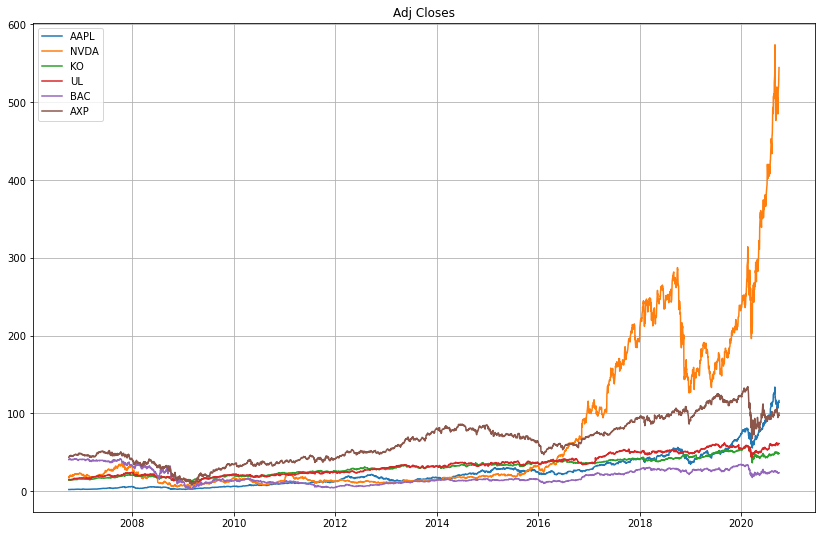

In [6]:
print("-- comparing all the stock's adj close in the list simultaneously")
dfs = {}
for s in all_stocks:
    dfs[s] = get_AdjC(dataframes[s])
plot_line(dfs, title = "Adj Closes", xlabel = "time", ylabel = "value").show()

In [7]:
def compared_CCreturns(stocks_in = []):
    # s is the stock's id
    # dfs contains all the dataframes that need to be compered
    dfs = {}
    for s in stocks_in:
        dfs[s] = compute_CCreturns(dataframes[s], aggregation = "M")
    
    return plot_line(dfs, title = "Continuous Compound of " + str(stocks_in), xlabel = "time", ylabel = "value")

-- comparing stocks according to their industry


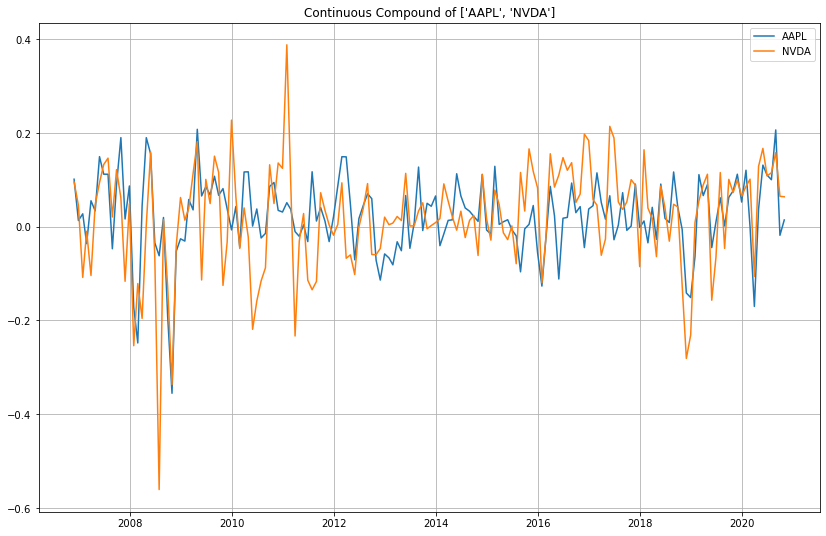

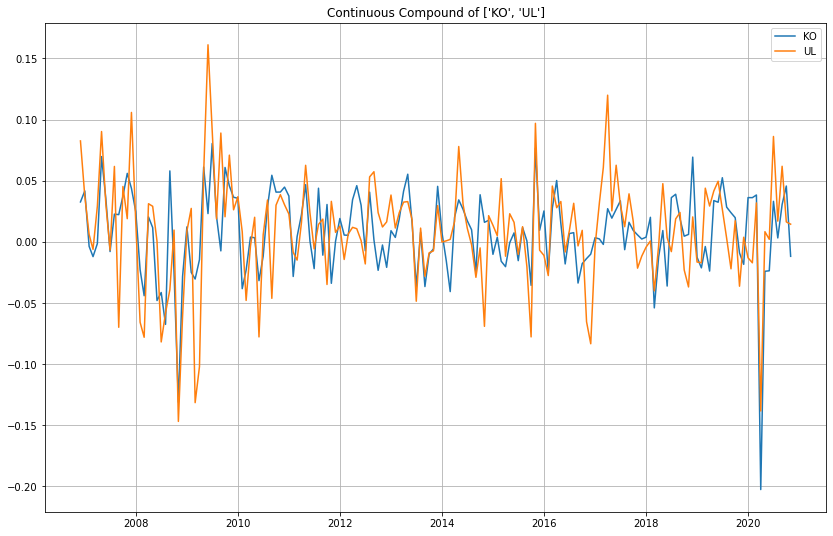

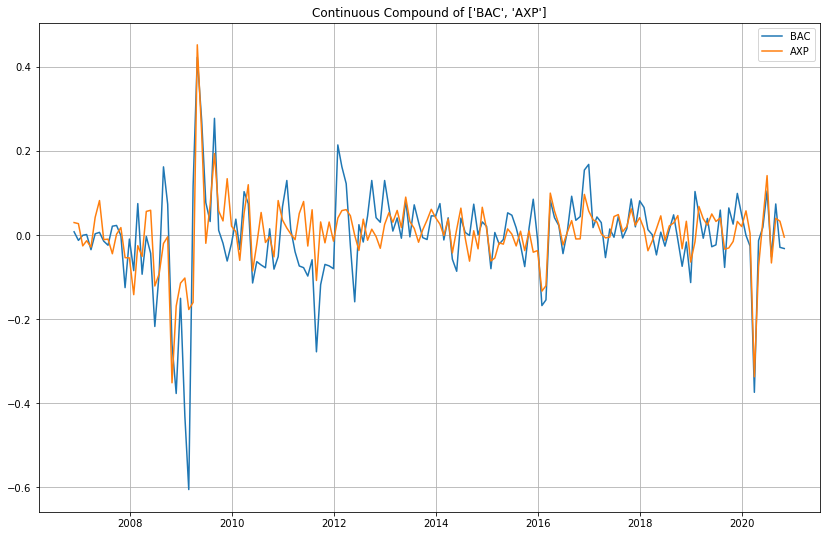

In [8]:
    print("-- comparing stocks according to their industry")
    compared_CCreturns(["AAPL", "NVDA"]).show()    # tech
    compared_CCreturns(["KO", "UL"]).show()        # food
    compared_CCreturns(["BAC", "AXP"]).show()      # bank

-- showing distribution CC returns


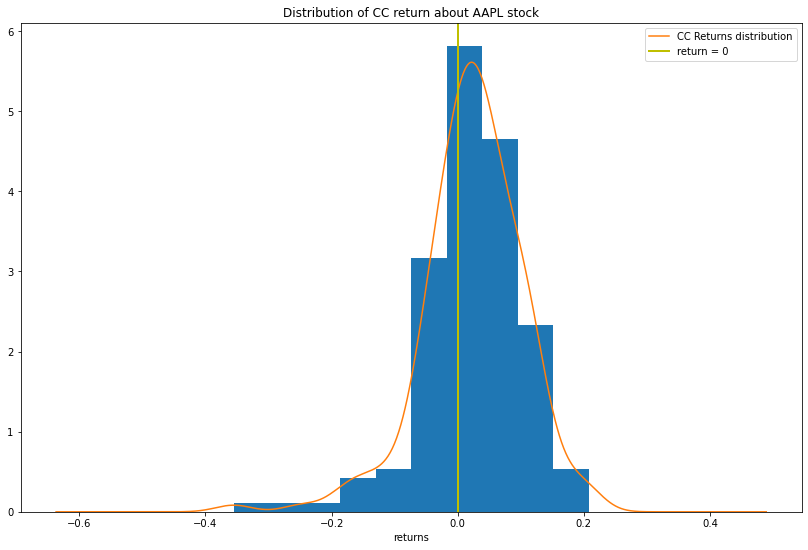

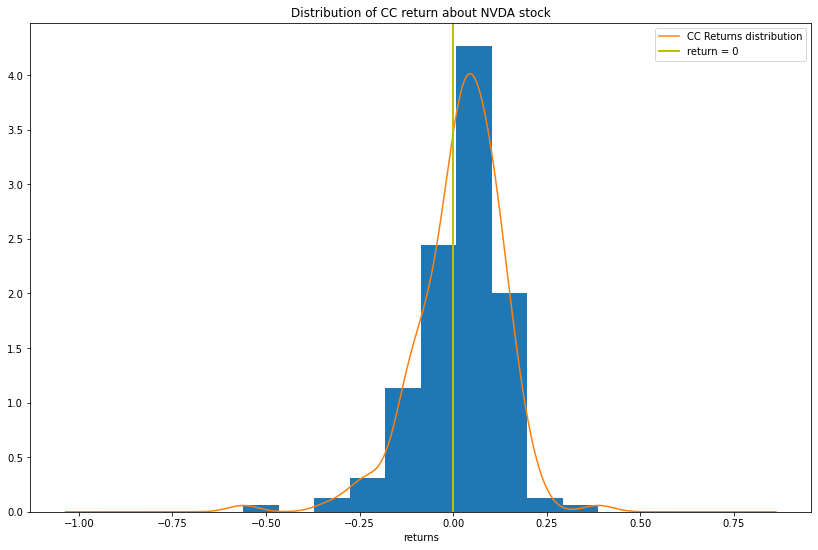

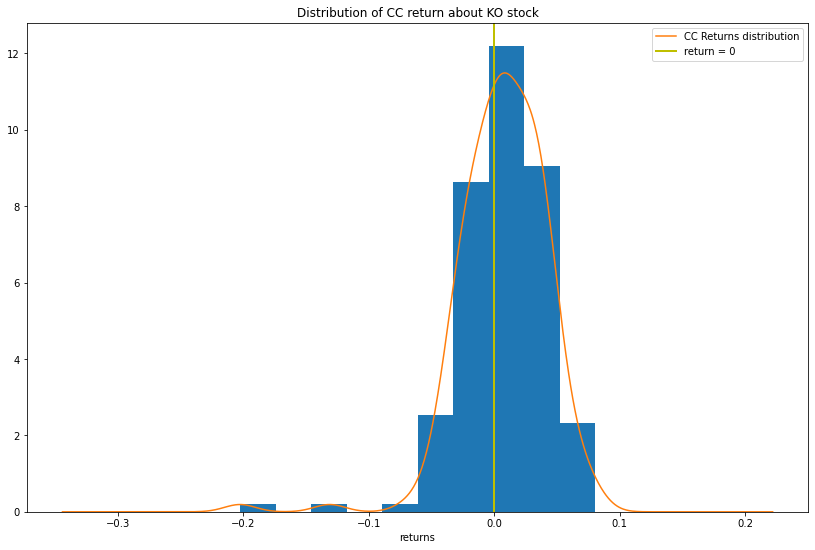

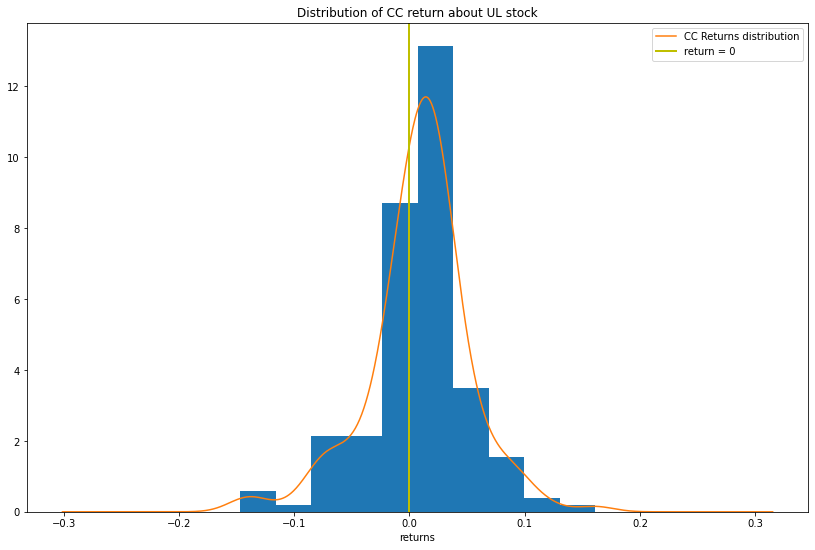

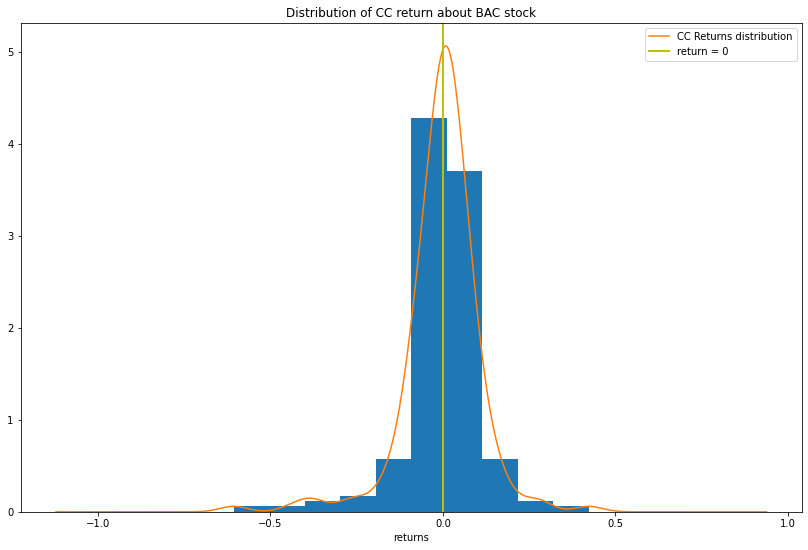

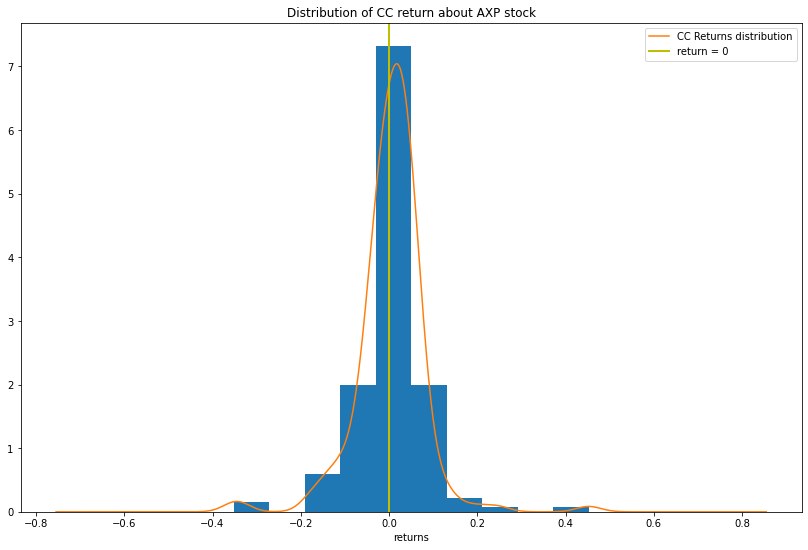

In [9]:
print("-- showing distribution CC returns")
for s in all_stocks:
    plot_hist(compute_CCreturns(dataframes[s]), zeroline = True, dens = True, title = "Distribution of CC return about " + s + " stock").show()
# histogram for diagnostic analysis
# il rischio è più basso quanto più i ritorni assumo la forma di una normale
# idea: generare una normale per comparare il risultato

# to-do: possibility to generate a subplot

In [10]:
def descriptive_stats(df):
    ret = {}
    ret["mean"] = df.mean()
    ret["var"] = df.var()
    ret["std"] = df.std()
    ret["min"] = df.min()
    ret["max"] = df.max()
    ret["skew"] = df.skew()             # simmetry
    # skewness -> measures symmetry of a distribution around its mean
    #             = 0 symmetric (normal distribution)
    #             > 0 longer right tail than normal distribution
    #             < 0 longer left tail than normal distribution
    ret["kurt"] = df.kurtosis()     # thickness
    # kurtosis -> measures tail thickness of distribution
    #             > 0 tail fatter than normal distribution tail
    #             < 0 tail thinner than normal distribution tail
    #             = 0 tail as normal distribution tail
    ret["0.25"] = df.describe()[4]
    ret["0.50"] = df.describe()[5]  # median value
    ret["0.75"] = df.describe()[6]

    return ret

In [11]:
for s in all_stocks:
    tmp = descriptive_stats(compute_CCreturns(dataframes[s]))
    counter = 1
    print(str(s) + ' CC return stats')
    for t in tmp:
        print(str(counter) + ' & ' + str(t) + ' & ', end='')
        print('%.5f' % tmp[t], end='')
        print(' \\\\')
        counter += 1
    print()


AAPL CC return stats
1 & mean & 0.02317 \\
2 & var & 0.00640 \\
3 & std & 0.08000 \\
4 & min & -0.35532 \\
5 & max & 0.20776 \\
6 & skew & -0.94559 \\
7 & kurt & 3.21730 \\
8 & 0.25 & -0.01650 \\
9 & 0.50 & 0.02279 \\
10 & 0.75 & 0.06840 \\

NVDA CC return stats
1 & mean & 0.01977 \\
2 & var & 0.01298 \\
3 & std & 0.11392 \\
4 & min & -0.56069 \\
5 & max & 0.38797 \\
6 & skew & -1.09807 \\
7 & kurt & 4.16580 \\
8 & 0.25 & -0.03126 \\
9 & 0.50 & 0.03586 \\
10 & 0.75 & 0.09365 \\

KO CC return stats
1 & mean & 0.00717 \\
2 & var & 0.00120 \\
3 & std & 0.03469 \\
4 & min & -0.20274 \\
5 & max & 0.08039 \\
6 & skew & -1.60913 \\
7 & kurt & 8.06855 \\
8 & 0.25 & -0.01249 \\
9 & 0.50 & 0.00744 \\
10 & 0.75 & 0.03239 \\

UL CC return stats
1 & mean & 0.00836 \\
2 & var & 0.00197 \\
3 & std & 0.04441 \\
4 & min & -0.14698 \\
5 & max & 0.16113 \\
6 & skew & -0.46510 \\
7 & kurt & 2.20980 \\
8 & 0.25 & -0.00878 \\
9 & 0.50 & 0.01218 \\
10 & 0.75 & 0.03038 \\

BAC CC return stats
1 & mean & -0.00

No handles with labels found to put in legend.


-- plotting min, max and quantiles in returns distribution


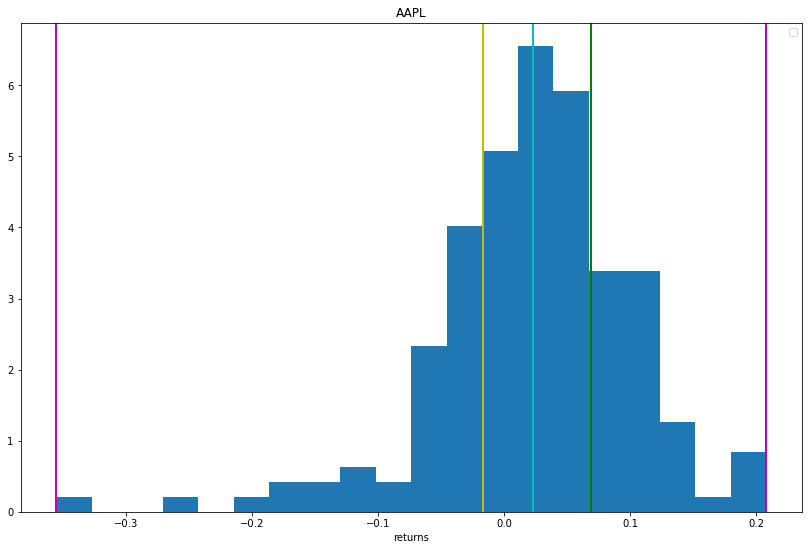

No handles with labels found to put in legend.


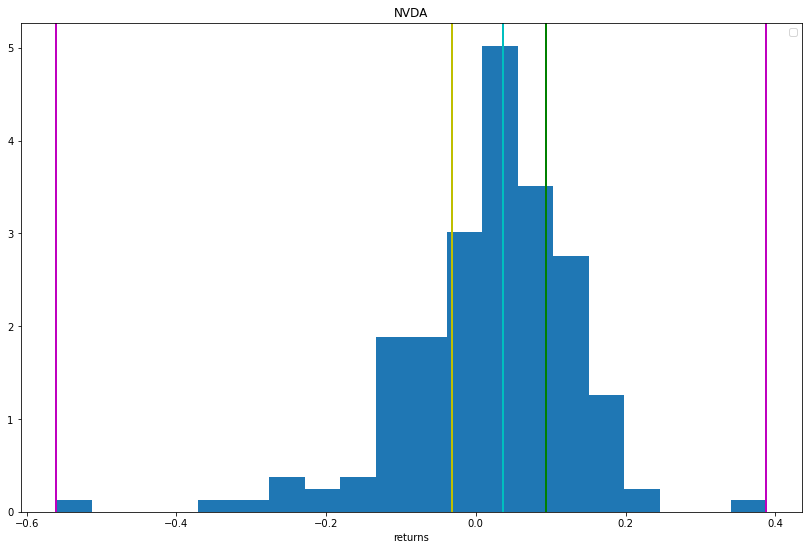

No handles with labels found to put in legend.


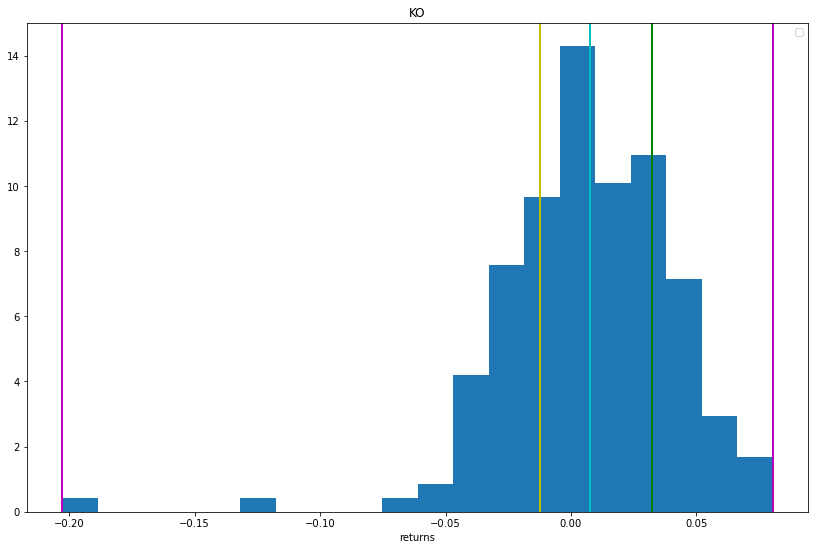

No handles with labels found to put in legend.


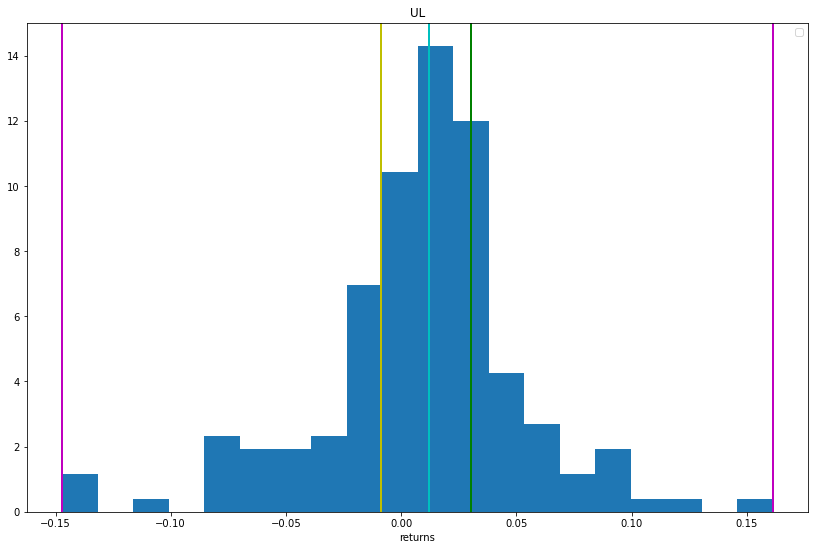

No handles with labels found to put in legend.


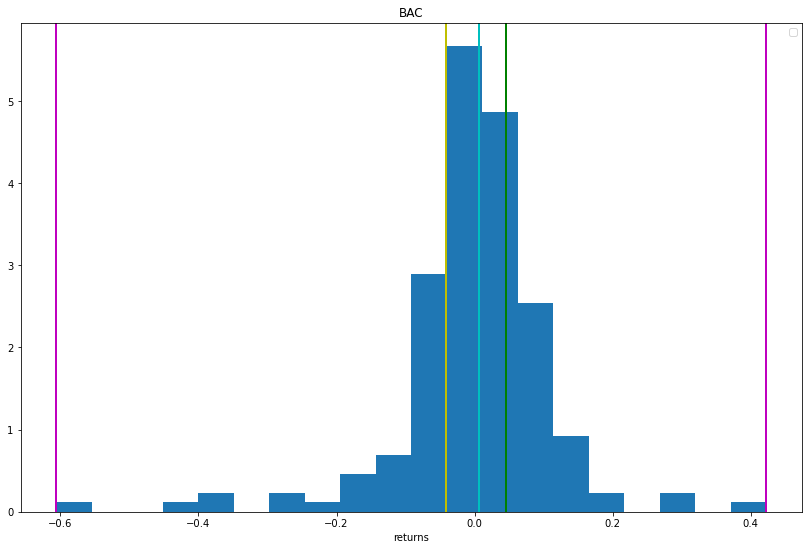

No handles with labels found to put in legend.


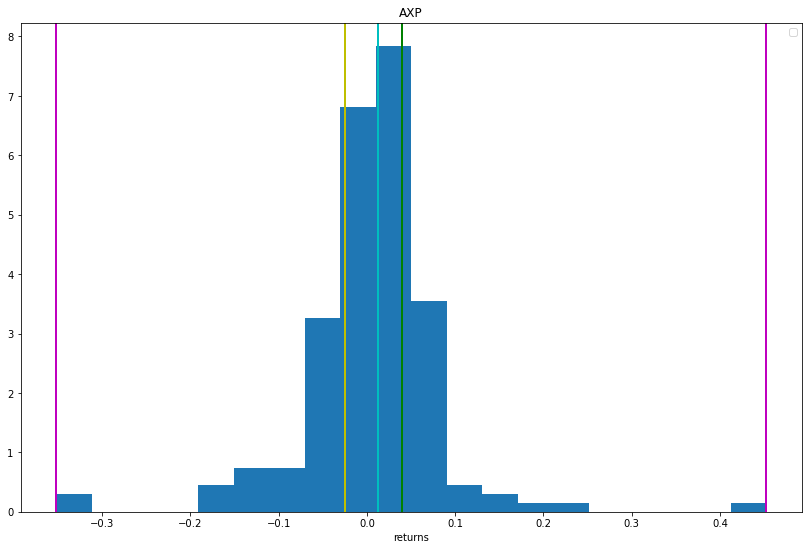

In [12]:
print("-- plotting min, max and quantiles in returns distribution")
for s in all_stocks:
    return_stock = compute_CCreturns(dataframes[s])
    stat = descriptive_stats(return_stock)
    plot_hist(return_stock, dens = False, title = s, bins = 20, xlines = list([stat["min"], stat["0.25"], stat["0.50"], stat["0.75"], stat["max"]])).show()

-- comparing gaussian distribution quantiles (red line) with stocks ones (qqplot) (blue points)
AAPL


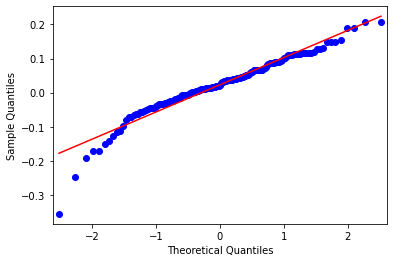

NVDA


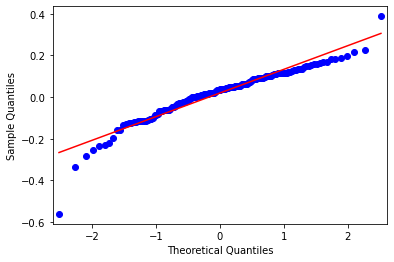

KO


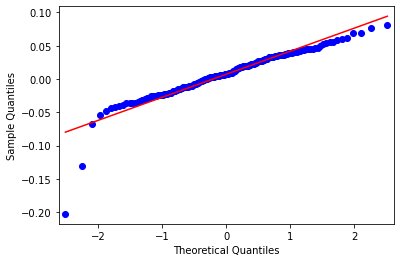

UL


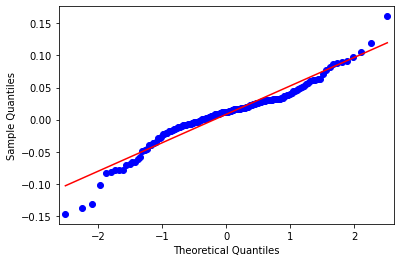

BAC


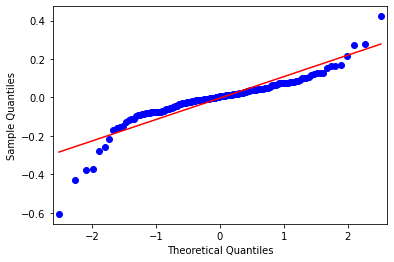

AXP


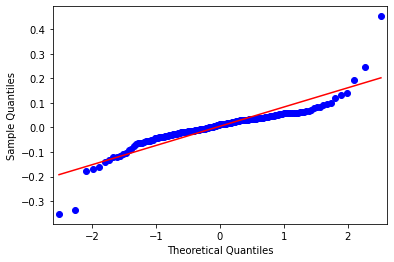

BAC starting from 2010


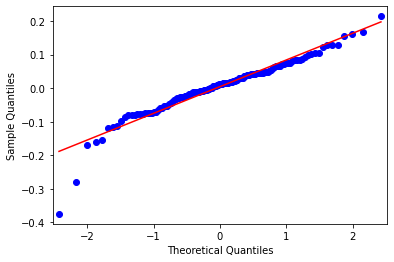

In [6]:
print("-- comparing gaussian distribution quantiles (red line) with stocks ones (qqplot) (blue points)")
# la lontananza aumenta il valore di kurtosis
import statsmodels.api as sm

for s in all_stocks:
    print(s)
    sm.qqplot(compute_CCreturns(dataframes[s]), line = 's')
    # plt.savefig('img/'+ str(27) + '-' + "qqplot " + s + ' 2010-2020' + '.png', dpi=300)
    plt.show()

print('BAC starting from 2010')
sm.qqplot(compute_CCreturns(dataframes['BAC'])['2010-01-31':], line = 's')
plt.savefig('tmp/27-qqplot BAC 2010-2020.png', dpi=300)

-- showing box plots of all shares


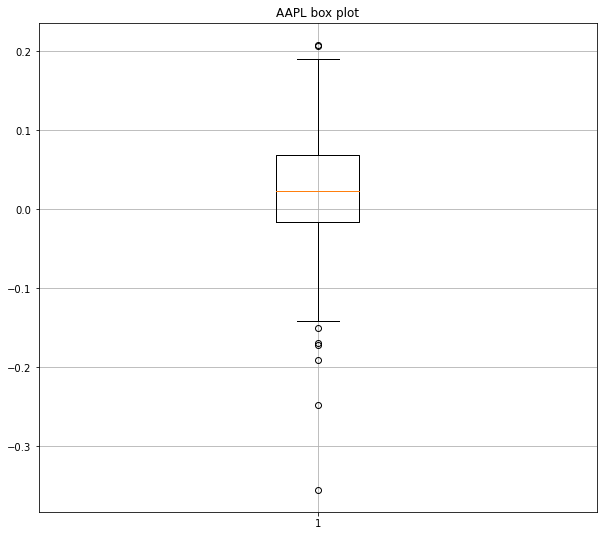

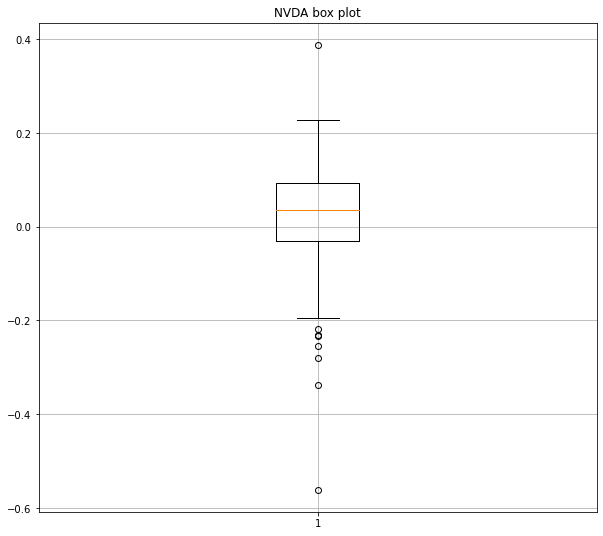

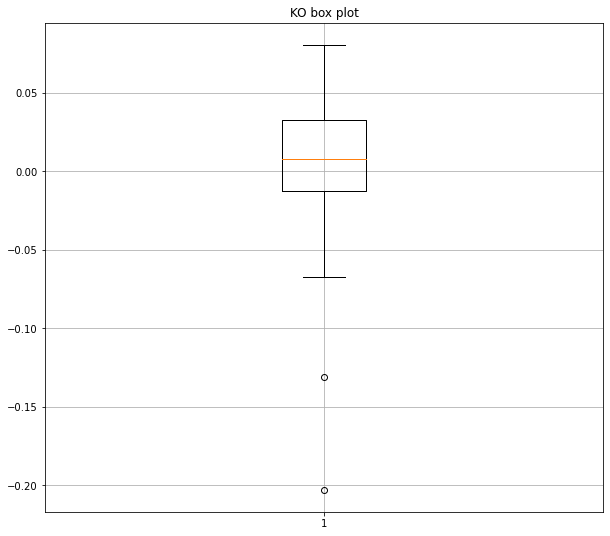

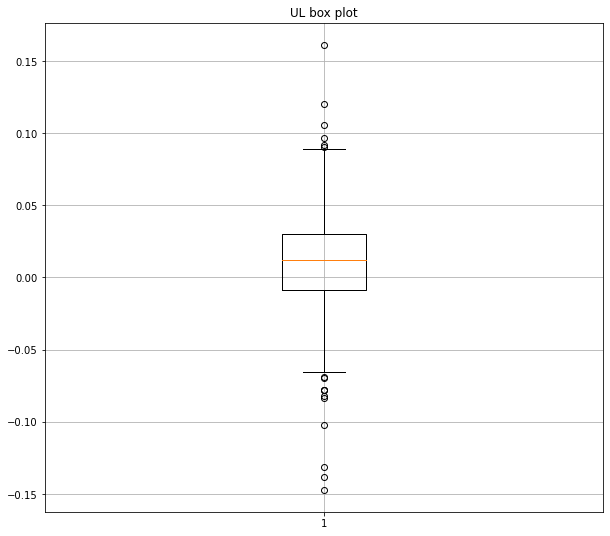

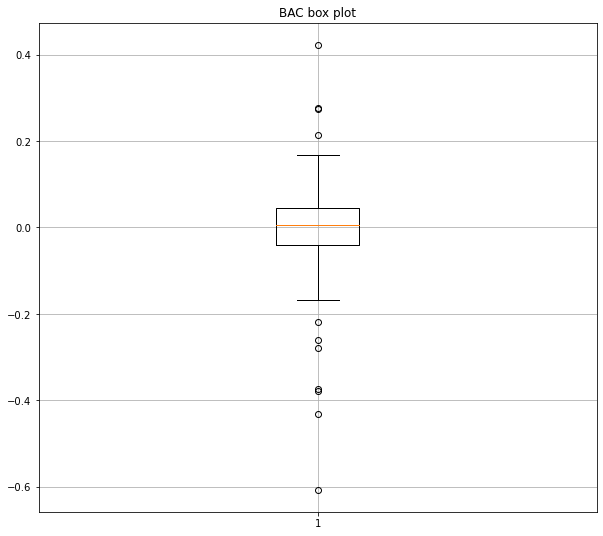

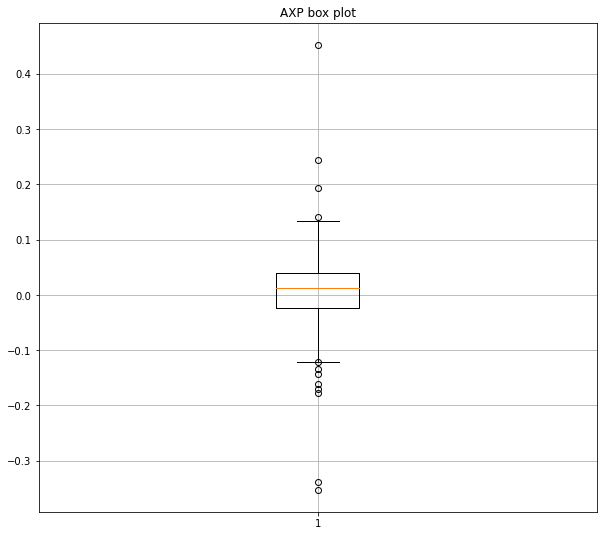

In [14]:
print("-- showing box plots of all shares")
for s in all_stocks:
    plot_box(compute_CCreturns(dataframes[s]), title = s + " box plot").show()

-- comparing boxplots of the same financial sectors


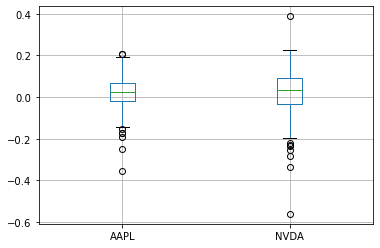

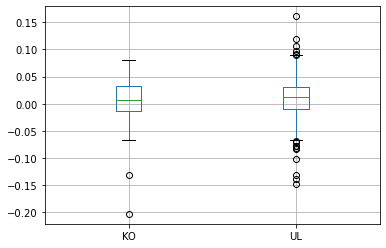

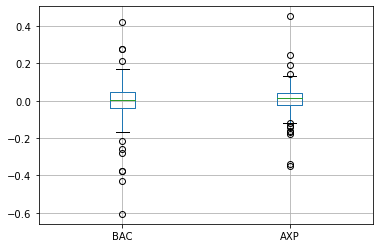

In [15]:
print("-- comparing boxplots of the same financial sectors")
data = pd.concat([compute_CCreturns(dataframes["AAPL"]), compute_CCreturns(dataframes["NVDA"])], axis=1)
data.columns = ["AAPL", "NVDA"]
data.boxplot()
# plt.savefig('img/'+ str(29) + '-' + "boxplot " + str(data.columns) +'.png', dpi=300)
plt.show()
data = pd.concat([compute_CCreturns(dataframes["KO"]), compute_CCreturns(dataframes["UL"])], axis=1)
data.columns = ["KO", "UL"]
data.boxplot()
# plt.savefig('img/'+ str(30) + '-' + "boxplot " + str(data.columns) +'.png', dpi=300)
plt.show()
data = pd.concat([compute_CCreturns(dataframes["BAC"]), compute_CCreturns(dataframes["AXP"])], axis=1)
data.columns = ["BAC", "AXP"]
data.boxplot()
# plt.savefig('img/'+ str(31) + '-' + "boxplot " + str(data.columns) +'.png', dpi=300)
plt.show()

In [16]:
print("-- Covariance matrix")
print("\tthe element Cij is the covariance of xi and xj")
print("\tthe element Cii is the variance of xi \n")

data = {}
for s in all_stocks: 
    data[s] = (compute_CCreturns(dataframes[s]))
    
df = pd.DataFrame(data, columns = all_stocks)

cov_matrix = pd.DataFrame.cov(df)
cov_matrix

-- Covariance matrix
	the element Cij is the covariance of xi and xj
	the element Cii is the variance of xi 



,AAPL,NVDA,KO,UL,BAC,AXP
AAPL,0.006399,0.004476,0.001036,0.001496,0.003091,0.003145
NVDA,0.004476,0.012977,0.000841,0.001113,0.004594,0.003231
KO,0.001036,0.000841,0.001204,0.000926,0.001166,0.001433
UL,0.001496,0.001113,0.000926,0.001972,0.001709,0.001904
BAC,0.003091,0.004594,0.001166,0.001709,0.012546,0.006173
AXP,0.003145,0.003231,0.001433,0.001904,0.006173,0.006169


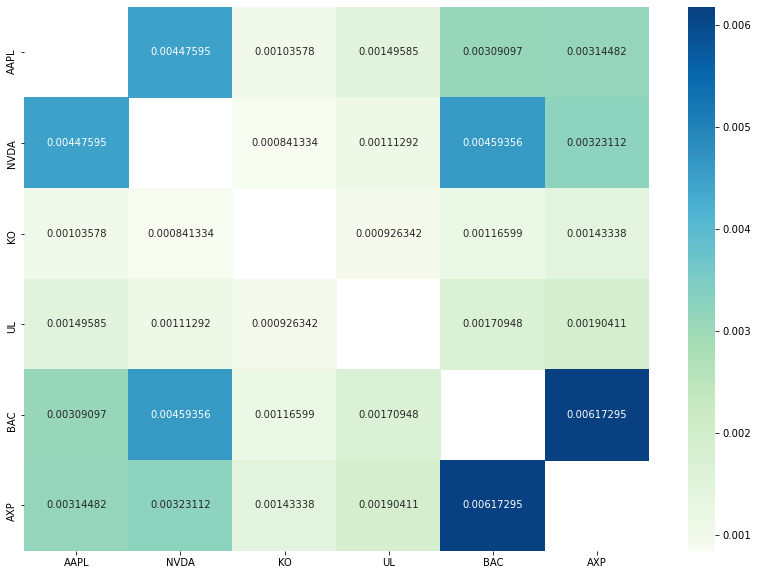

In [17]:
import seaborn as sn
plt.figure(figsize = (14, 10))

for i in range(cov_matrix.shape[1]):
    cov_matrix.iloc[i, i] = np.nan

sn.heatmap(cov_matrix, annot = True, fmt='g', cmap="GnBu")
# plt.savefig('img/'+ str(32) + '-' + "covmatrix_no_diagonal.png", dpi=300)
plt.show()

# se la cov = 0 non si può dire che le azioni variano in maniera lineare insieme
# se il valore di cov è alta allora variano in modo simile tra loro

In [18]:
print("-- Correlation matrix")
print("\tthe element Cij is the correlation of xi and xj")
data = {}
for s in all_stocks: 
    data[s] = compute_CCreturns(dataframes[s])
    
df = pd.DataFrame(data, columns = all_stocks)
corr_matrix = pd.DataFrame.corr(df)
corr_matrix

-- Correlation matrix
	the element Cij is the correlation of xi and xj


,AAPL,NVDA,KO,UL,BAC,AXP
AAPL,1.000000,0.491169,0.373224,0.421083,0.344971,0.500518
NVDA,0.491169,1.000000,0.212888,0.220000,0.360013,0.361125
KO,0.373224,0.212888,1.000000,0.601297,0.300069,0.526046
UL,0.421083,0.220000,0.601297,1.000000,0.343689,0.545921
BAC,0.344971,0.360013,0.300069,0.343689,1.000000,0.701681
AXP,0.500518,0.361125,0.526046,0.545921,0.701681,1.000000


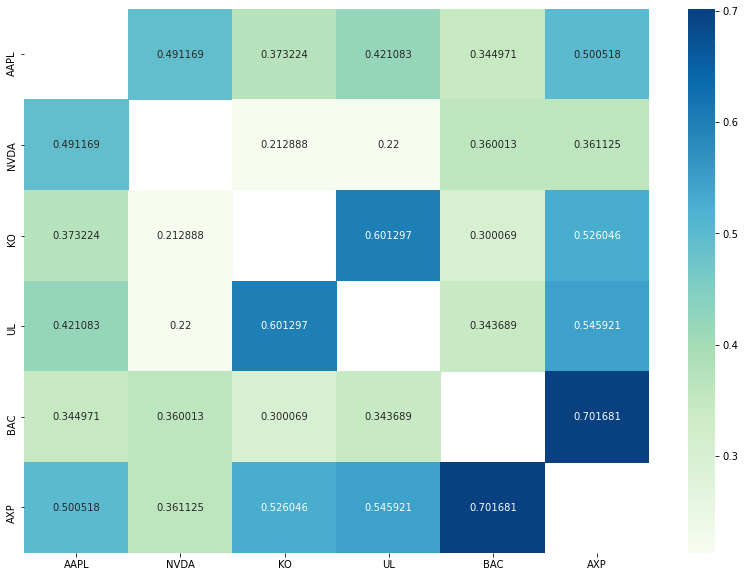

In [19]:
# import seaborn as sn
plt.figure(figsize = (14, 10))

for i in range(corr_matrix.shape[1]):
    corr_matrix.iloc[i, i] = np.nan

sn.heatmap(corr_matrix, annot = True, fmt='g', cmap="GnBu")
# plt.savefig('img/'+ str(33) + '-' + "corrmatrix_no_diagonal.png", dpi=300)
plt.show()

-- Scatter plot


AAPL



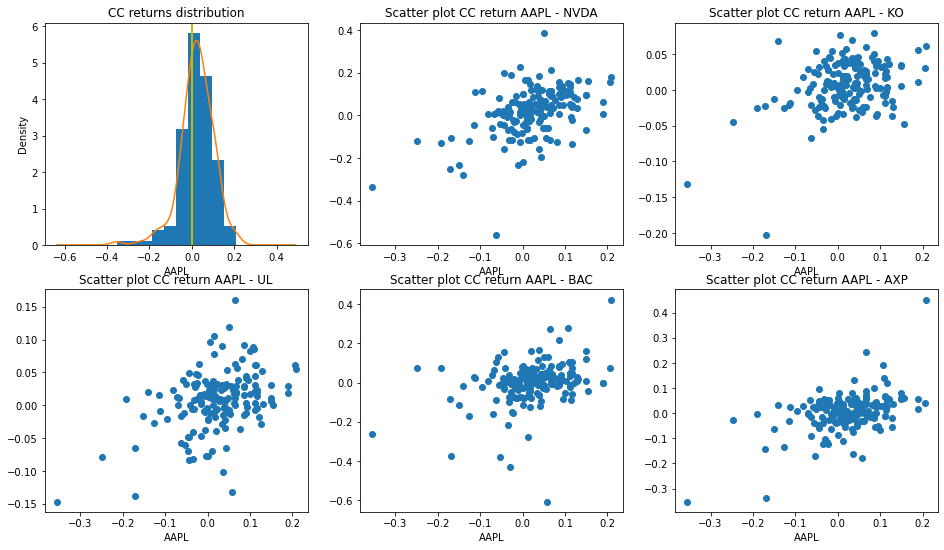



NVDA



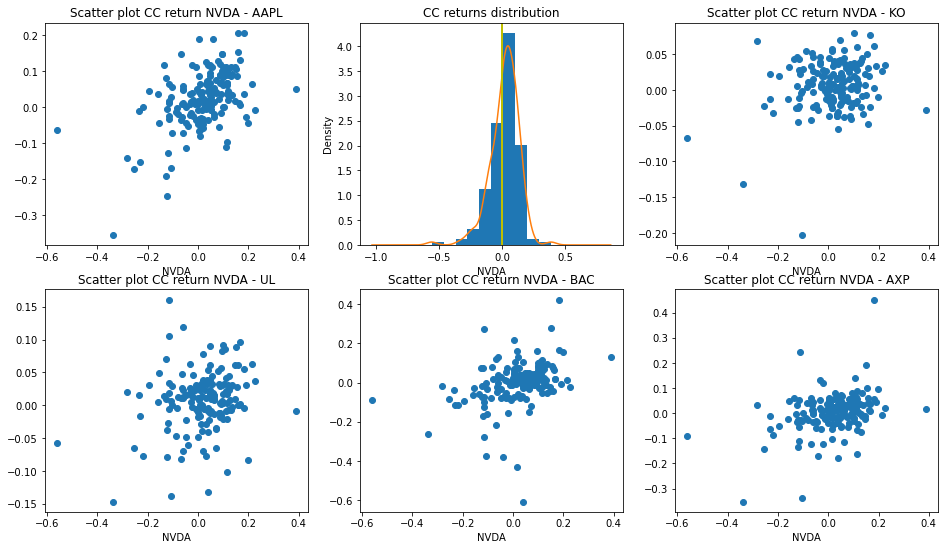



KO



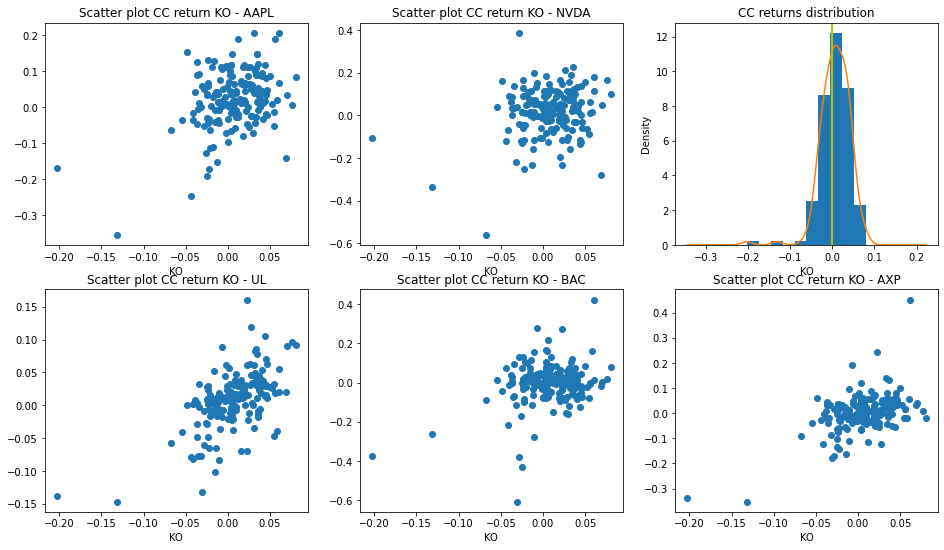



UL



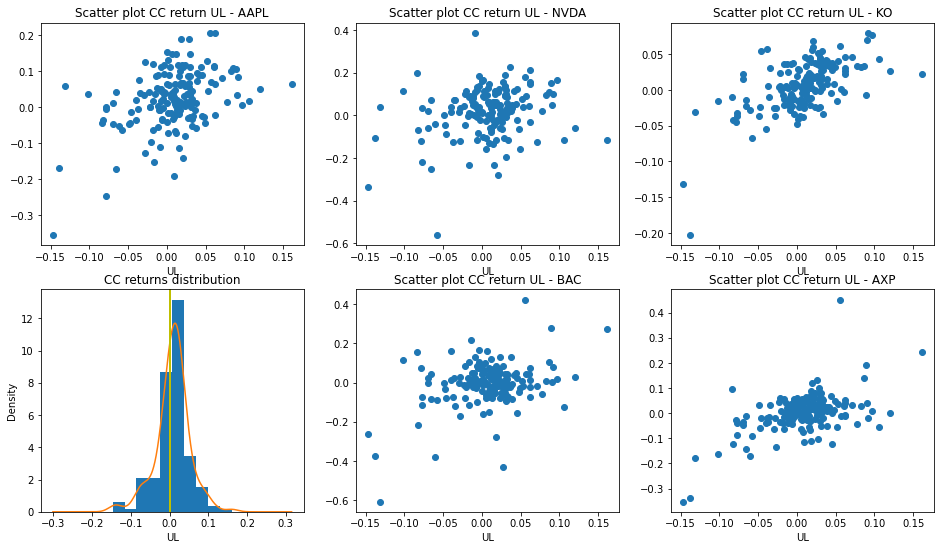



BAC



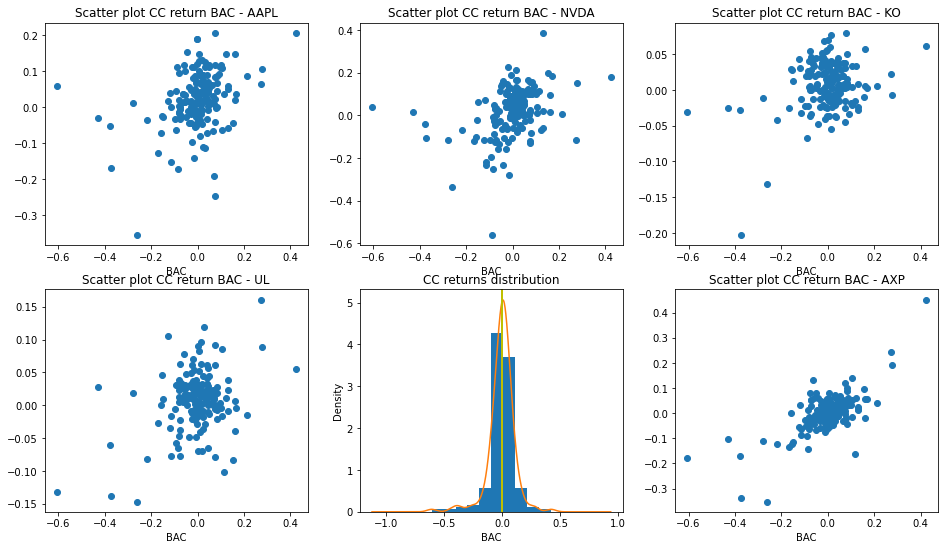



AXP



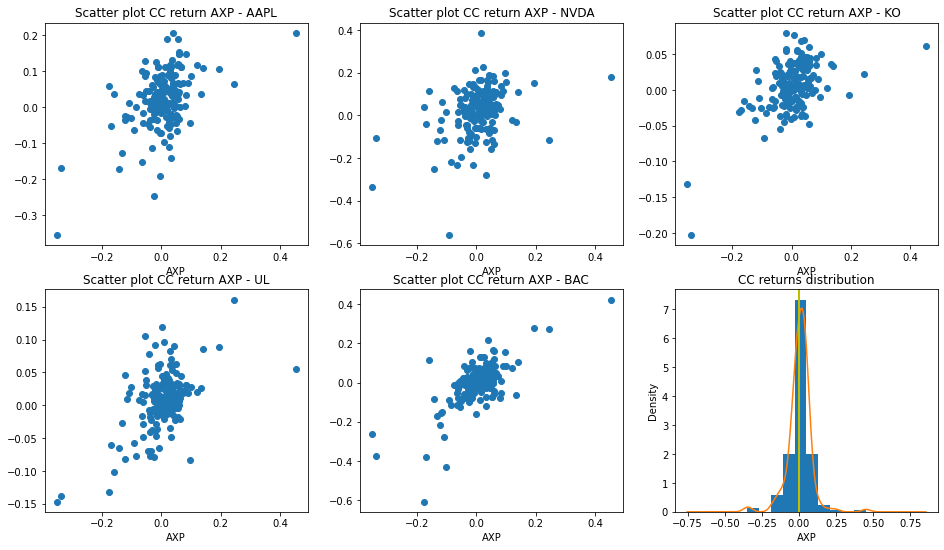

In [20]:
# scatter plot
print("-- Scatter plot")

stocks = all_stocks
for s0 in stocks:
    count = 1
    plt.figure(figsize = (16, 9))
    print("\n\n" + s0 + "\n")
    tmp_df = compute_CCreturns(dataframes[s0])
    for s1 in stocks:
        # da cambiare str(2) + str(3) in caso di più azioni
        plt.subplot(int(str(2) + str(3) + str(count)))
        if s0 == s1:
            plt.hist(tmp_df, density = True)
            tmp_df.plot.density(label = "CC Returns distribution")
            plt.title("CC returns distribution")
            plt.axvline(x=0, linewidth=2, color='y', label = "return = 0")
        else:
            plt.scatter(tmp_df, compute_CCreturns(dataframes[s1]), marker = 'o')
            plt.title("Scatter plot CC return " + s0 + " - " + s1)
        plt.xlabel(s0)
        count = count + 1
    # plt.savefig('img/'+ str(34) + '-' + "scatter plot " + s0 + ".png", dpi=300)
    plt.show()

Grafico di dispersione: più il grafico è simile a una retta (o comunque punti più vicini possibile), più i titoli sono tra loro correlati.
Da considerare anche outliers

Calcolo del beta:

In [21]:
def beta_calc(stock, market_index):
    beta = stock.cov(market_index) / market_index.var()
    return beta

In [22]:
def c_beta_calc(stocks, market_index, delta_t = 18):
    length_period = market_index.shape[0] # length period for the stock's time series
    start = delta_t # default: first month after the 20 months to calculate the first value of beta
    
    betas = {}
    ccrs = {}
    for s in stocks:
        ccrs[s] = compute_CCreturns(dataframes[s])
        betas[s] = pd.Series(dtype = 'float64') # riempio con serie vuote per poi effettuare la concatenazione
        
    for i in range(start, length_period):
        for s in stocks:
            value = beta_calc(ccrs[s][i - delta_t:i - 1], market_index[i - delta_t:i - 1])
            serie = pd.Series([value], index = ccrs[s].index[[i]])
            betas[s] = pd.concat([betas[s], serie], axis = 0)

    return betas

[] downloading ^GSPC	 -> Done


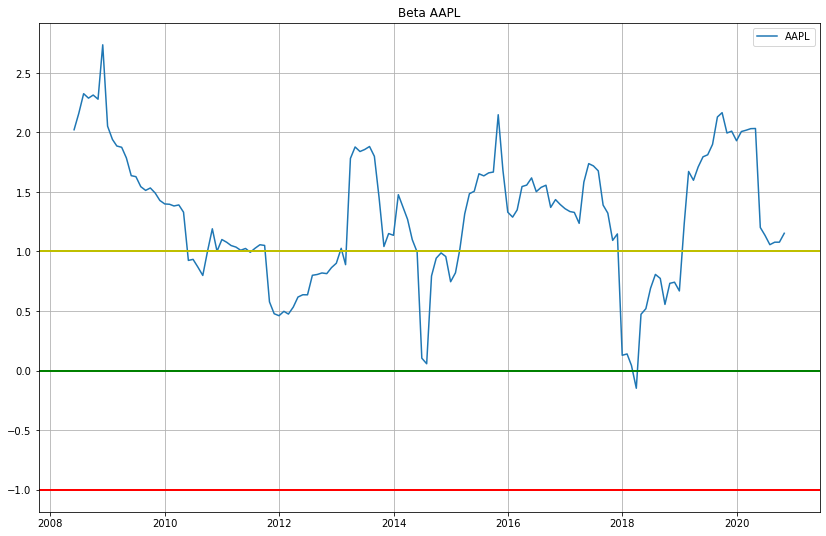

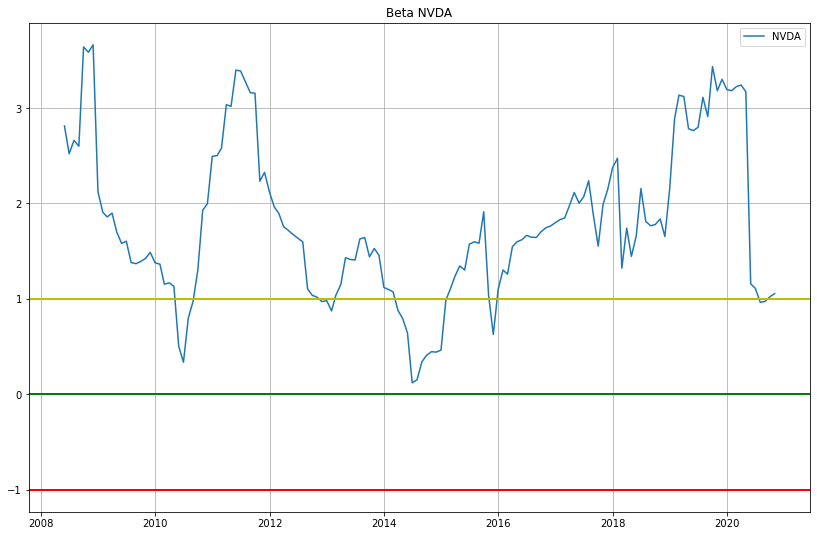

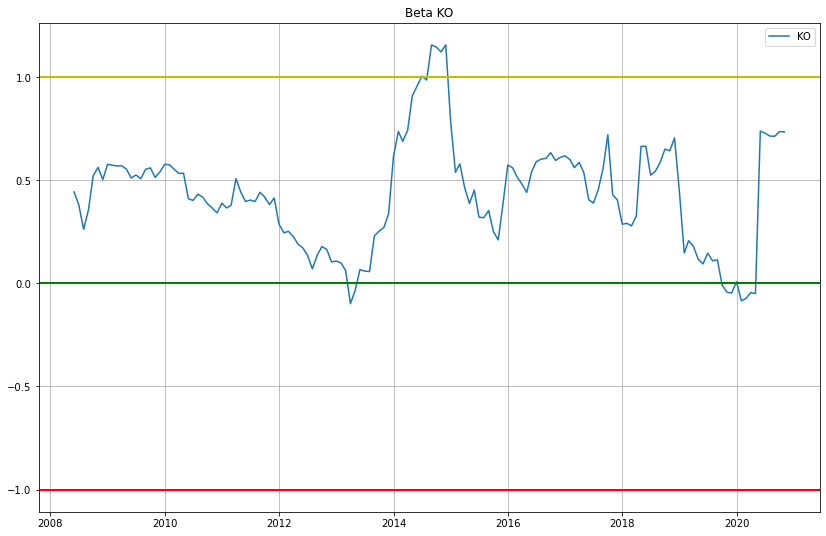

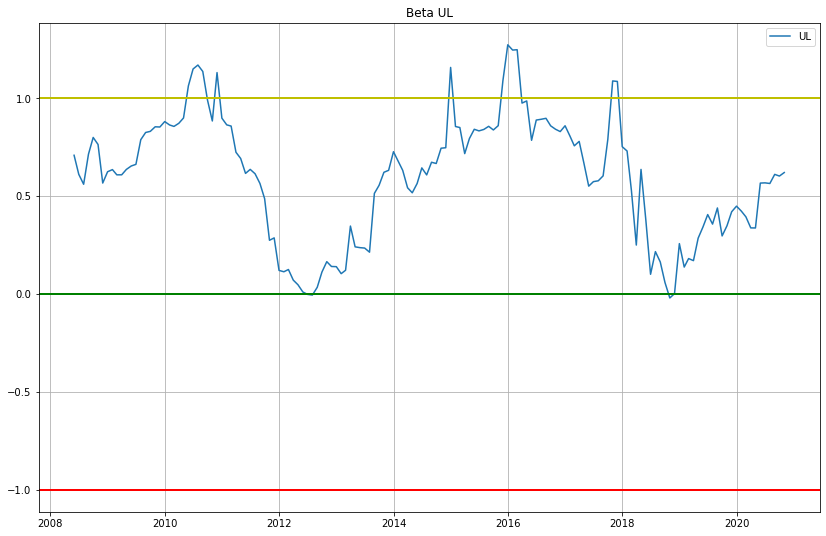

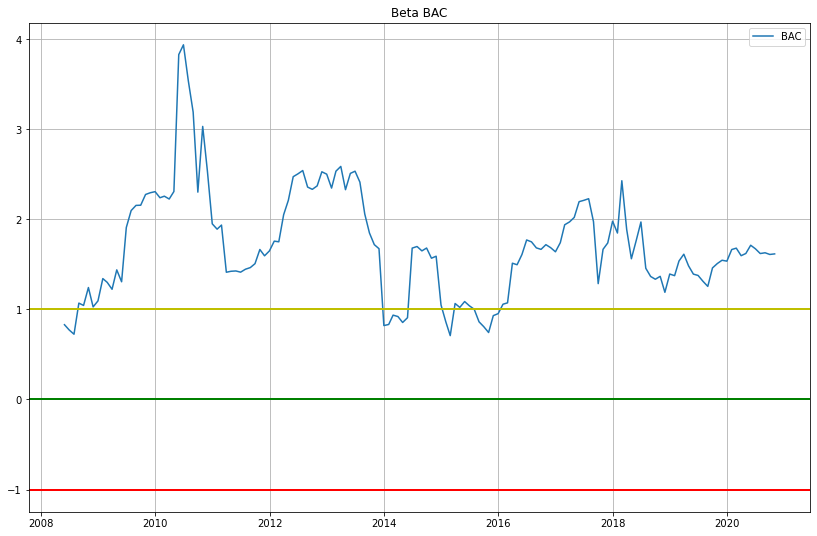

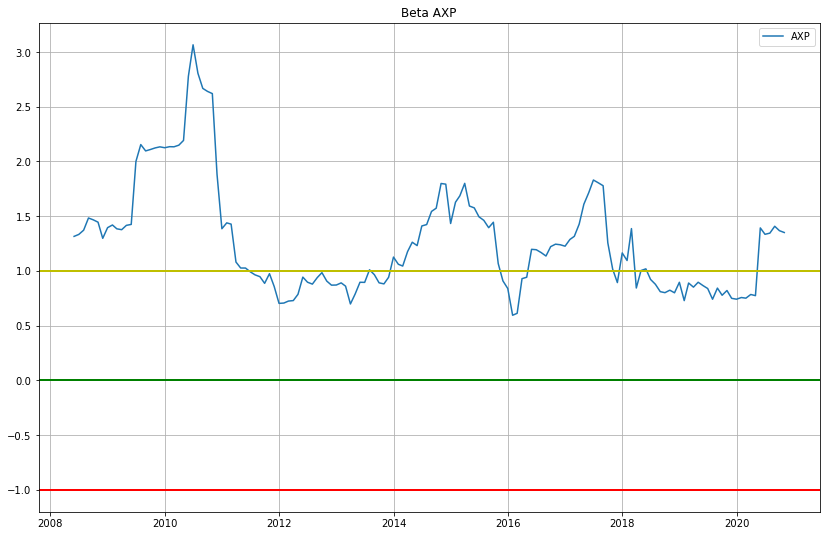

In [23]:
market_index_name = "^GSPC"
# you can change the market index name in whatever you want, default = S&P 500
market_index = compute_CCreturns(download_data(stocks = [market_index_name], start_stream = start_period)[market_index_name])
betas = c_beta_calc(all_stocks, market_index)

for s in all_stocks:
    plt = plot_line(df = {s: betas[s]}, title = "Beta " + s, xlabel = "time", ylabel = "beta", grid = True)
    plt.axhline(y = -1, linewidth = 2, color = 'r')
    plt.axhline(y = 0, linewidth = 2, color = 'g')
    plt.axhline(y = 1, linewidth = 2, color = 'y')
    # plt.savefig('img/'+ str(0) + '-' + "Beta " + s +'.png', dpi=300)
    plt.show()

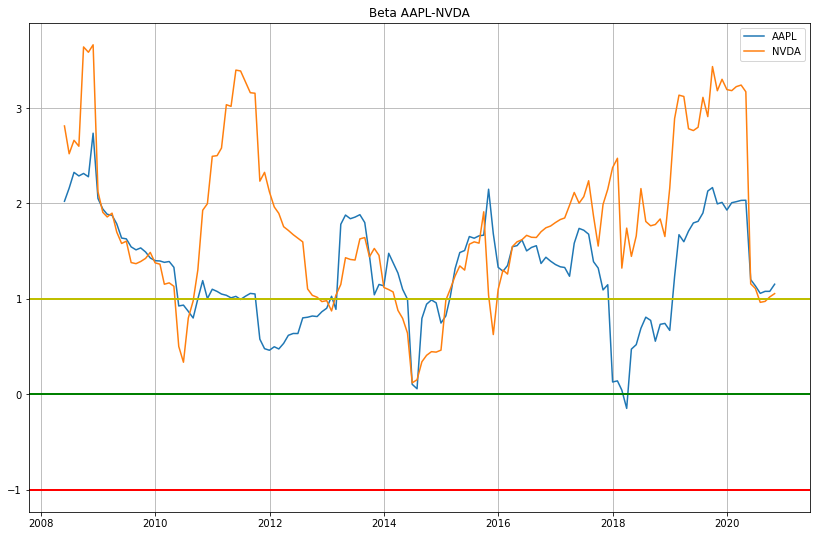

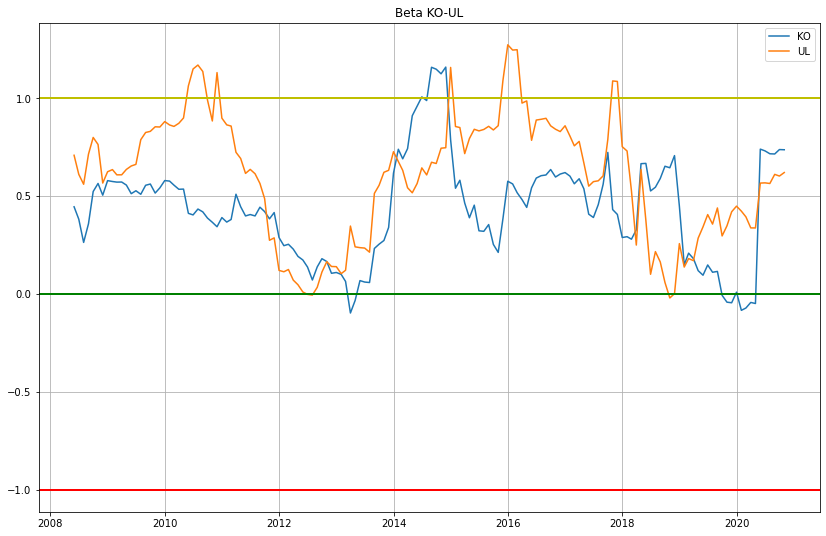

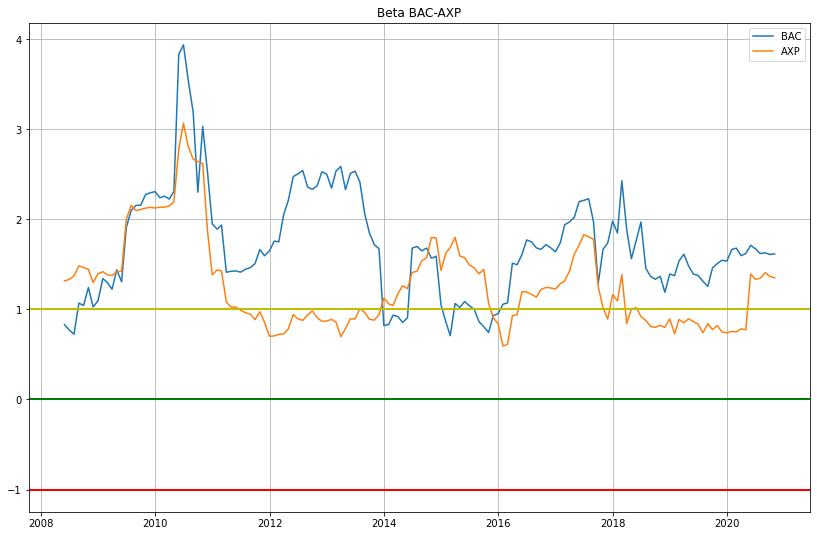

In [24]:
plt = plot_line({'AAPL': betas['AAPL'], 'NVDA': betas['NVDA']}, title = "Beta AAPL-NVDA", xlabel = "time", ylabel = "beta", grid = True)
plt.axhline(y = -1, linewidth = 2, color = 'r')
plt.axhline(y = 0, linewidth = 2, color = 'g')
plt.axhline(y = 1, linewidth = 2, color = 'y')
plt.savefig('img/'+ str(98) + '-' + 'Beta AAPL-NVDA.png', dpi=300)
plt.show()

plt = plot_line({'KO': betas['KO'], 'UL': betas['UL']}, title = "Beta KO-UL", xlabel = "time", ylabel = "beta", grid = True)
plt.axhline(y = -1, linewidth = 2, color = 'r')
plt.axhline(y = 0, linewidth = 2, color = 'g')
plt.axhline(y = 1, linewidth = 2, color = 'y')
plt.savefig('img/'+ str(99) + '-' + 'Beta KO-UL.png', dpi=300)
plt.show()

plt = plot_line({'BAC': betas['BAC'], 'AXP': betas['AXP']}, title = "Beta BAC-AXP", xlabel = "time", ylabel = "beta", grid = True)
plt.axhline(y = -1, linewidth = 2, color = 'r')
plt.axhline(y = 0, linewidth = 2, color = 'g')
plt.axhline(y = 1, linewidth = 2, color = 'y')
plt.savefig('img/'+ str(100) + '-' + 'Beta BAC-AXP.png', dpi=300)
plt.show()

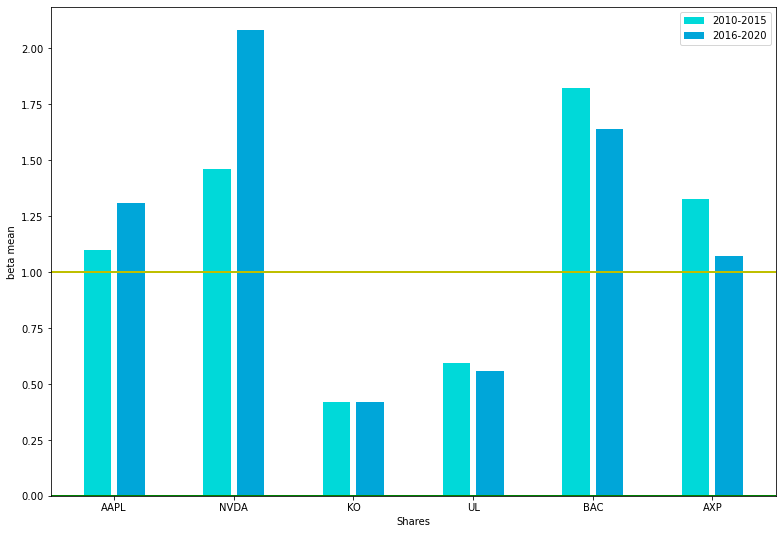

In [25]:
beta_mean = {}
for s in stocks:
    beta_mean[s] = [betas[s]['2010-01-31':'2015-12-31'].mean(),
                    betas[s]['2016-01-31':'2020-12-31'].mean()]

dfhello = pd.DataFrame.from_dict(beta_mean, orient='index', columns = ['2010 - 2015', '2016 - 2020'])


barWidth = .23
space = .05
plt.figure(figsize = (13, 9))
r1 = np.arange(len(stocks))
r2 = [x + barWidth + space for x in r1]
plt.bar(r1, dfhello['2010 - 2015'], width=barWidth, label='2010-2015', color = '#00d9d9')
plt.bar(r2, dfhello['2016 - 2020'], width=barWidth, label='2016-2020', color = '#00a6d9')
plt.xlabel('Shares')
plt.ylabel('beta mean')
plt.xticks([r + (barWidth + space)/2 for r in range(len(stocks))], stocks)
plt.axhline(y = 0, linewidth = 2, color = 'g')
plt.axhline(y = 1, linewidth = 2, color = 'y')
plt.legend()
# plt.savefig('img/'+ str(96) + '-' + 'Beta_period_10_15_20.png', dpi=300)
plt.show()

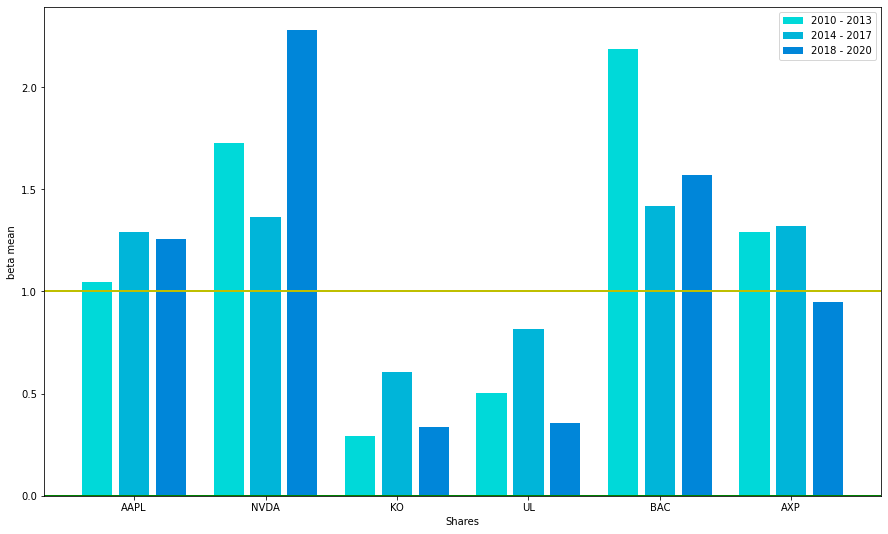

In [26]:
for s in stocks:
    beta_mean[s] = [betas[s]['2010-01-31':'2013-12-31'].mean(),
                    betas[s]['2014-01-31':'2017-12-31'].mean(),
                    betas[s]['2018-01-31':'2020-12-31'].mean()]

dfhello = pd.DataFrame.from_dict(beta_mean, orient='index', columns = ['2010 - 2013', '2014 - 2017', '2018 - 2020'])


barWidth = .23
space = .05
plt.figure(figsize = (15, 9))
r1 = np.arange(len(stocks))
r2 = [x + barWidth + space for x in r1]
r3 = [x + (barWidth + space)*2 for x in r1]
plt.bar(r1, dfhello['2010 - 2013'], width=barWidth, label='2010 - 2013', color = '#00d9d9')
plt.bar(r2, dfhello['2014 - 2017'], width=barWidth, label='2014 - 2017', color = '#00b5d9')
plt.bar(r3, dfhello['2018 - 2020'], width=barWidth, label='2018 - 2020', color = '#0086d9')
plt.xlabel('Shares')
plt.ylabel('beta mean')
plt.xticks([r + (barWidth + space) for r in range(len(stocks))], stocks)
plt.axhline(y = 0, linewidth = 2, color = 'g')
plt.axhline(y = 1, linewidth = 2, color = 'y')
plt.legend()
# plt.savefig('img/'+ str(97) + '-' + 'Beta_period_10_13_17_20.png', dpi=300)
plt.show()